<h2 align=center> Principal Component Analysis</h2>

####  PCA is a linear transform method, inly they transform the data and project on a linear subspace. nothing complex in here. It returns the principal components that maximize the variance of our data. 
There are 2 general ways to perform PCA. 
The more general and computationally effective way is SVD. 
It can also be calculated via decomposition (1st calculate covariance matrix then decompose it into eigenvector, eigenvalues)
 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
iris = pd.read_csv('iris.csv', header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.columns=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width', 'species']
iris.dropna(how = "all", inplace = False)  # 'all' : If all values are NA, drop that row or column.
iris.head()

,sepal_length,sepal_width,petal_lenth,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenth   150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###  Visualize the Data
---

In [ ]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
                hue = iris.species, style = iris.species)

###  Standardize the Data
---

In [7]:
from sklearn.preprocessing import StandardScaler
X = iris.iloc[:, 0:4].values
y = iris.species.values
X = StandardScaler().fit_transform(X)


##  2nd method:(Eigendecomposition method)Compute the Eigenvectors and Eigenvalues
---

####   1st calculate the Coviance matrix

In [8]:
covariance_matrix = np.cov(X.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


####    Then calculate Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [9]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]


###  1st method: Singular Value Decomposition (SVD)----less effective (can be claculate from 1 line code)
---

In [10]:
eigen_vec_svd, s, v= np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

##  Picking Principal Components Using the Explained Variance
---

In [11]:
for val in eigen_values:
    print(val)

2.9380850501999944
0.9201649041624874
0.14774182104494807
0.02085386217646228


In [13]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]

### the above value tell sus that the 1 feature colum of our dataset conatin 72% varinace among data
### both 1 and 2nd feature colum of our dataset conatin (72+22)% varinace among data
### both 1 and 2nd 3nd and 4th feature colum of our dataset conatin (100)% varinace among data

In [14]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

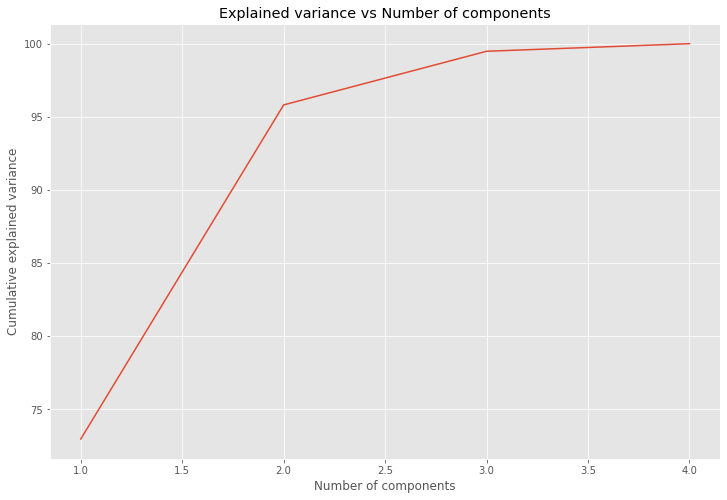

In [15]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [21]:
# *Since the initial 2 principal components have high variance.
#   so, we select pc-1 and pc-2.
#---------------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1','PC-2'])

In [22]:
# Adding lables
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

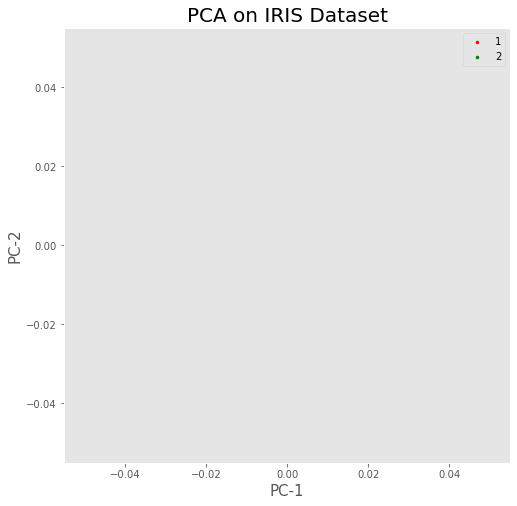

In [25]:
# Plotting pc1 & pc2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA on IRIS Dataset', fontsize = 20)
targets = [1,2]
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 9)
ax.legend(targets)
ax.grid()
plt.show() # FOR SHOWING THE PLOT

###  Project Data Onto Lower-Dimensional Linear Subspace
---

In [16]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T

print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [17]:
X_pca = X.dot(projection_matrix)

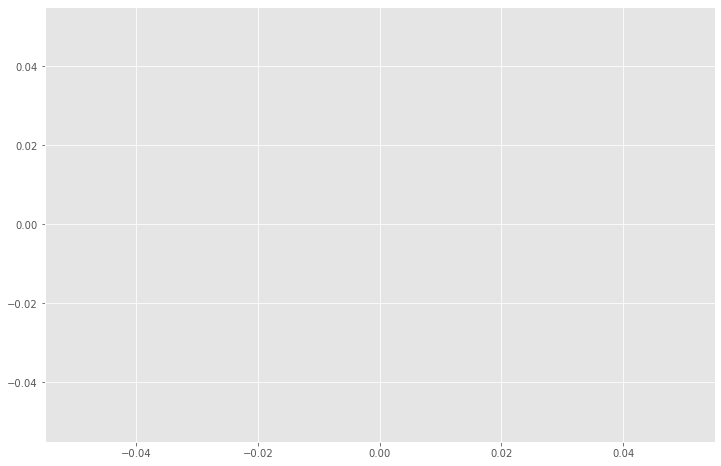

In [18]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0], X_pca[y==species, 1],markers=True,legend="brief")